In [82]:
#Imports
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from six import StringIO
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.preprocessing import StandardScaler
from IPython.display import Image  
import pydotplus
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,mean_squared_error, r2_score
import warnings
from sklearn import tree
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
import json
warnings.filterwarnings("ignore")

In [2]:
#Names of columns from our database
df = pd.read_csv("covid_data.csv")
for col in df.columns:
    print(col)
#We change name for future
df.rename(columns= {'DATE_DIED':"DEATH"},inplace=True)

USMER
MEDICAL_UNIT
SEX
PATIENT_TYPE
DATE_DIED
INTUBED
PNEUMONIA
AGE
PREGNANT
DIABETES
COPD
ASTHMA
INMSUPR
HIPERTENSION
OTHER_DISEASE
CARDIOVASCULAR
OBESITY
RENAL_CHRONIC
TOBACCO
CLASIFFICATION_FINAL
ICU


In [3]:
#All columns I wanna include
cols =['USMER','MEDICAL_UNIT','SEX','PATIENT_TYPE','DEATH','INTUBED','PNEUMONIA','AGE','PREGNANT','DIABETES',
          'COPD','ASTHMA','HIPERTENSION','OTHER_DISEASE',
          'CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO']

In [4]:
#Deleted columns which I don't understand
df = df.drop('INMSUPR', axis=1)
df = df.drop('CLASIFFICATION_FINAL', axis=1)
df = df.drop('ICU', axis=1)

In [5]:
df_for_stats = df.iloc[:2000]
cols_for_stats=cols
cols_for_stats.remove("DEATH")
for col in cols:
    print("For ",col,
          ":\nMean: ",df_for_stats[col].mean(),
         "\nMin: ",df_for_stats[col].min(),
         "\nMax: ",df_for_stats[col].max(),
         "\nStd: ",df_for_stats[col].std())

For  USMER :
Mean:  1.4255 
Min:  1 
Max:  2 
Std:  0.49454224897172244
For  MEDICAL_UNIT :
Mean:  2.7645 
Min:  1 
Max:  3 
Std:  0.5755044332377798
For  SEX :
Mean:  1.594 
Min:  1 
Max:  2 
Std:  0.491207331298262
For  PATIENT_TYPE :
Mean:  1.745 
Min:  1 
Max:  2 
Std:  0.4359702226270835
For  INTUBED :
Mean:  30.557 
Min:  1 
Max:  99 
Std:  43.9777531529999
For  PNEUMONIA :
Mean:  2.2775 
Min:  1 
Max:  99 
Std:  9.734108597354592
For  AGE :
Mean:  56.1155 
Min:  0 
Max:  100 
Std:  19.370590327473693
For  PREGNANT :
Mean:  58.5235 
Min:  1 
Max:  98 
Std:  46.650300889024486
For  DIABETES :
Mean:  2.1125 
Min:  1 
Max:  98 
Std:  6.465272122796605
For  COPD :
Mean:  2.4 
Min:  1 
Max:  98 
Std:  6.431538100732248
For  ASTHMA :
Mean:  2.4115 
Min:  1 
Max:  98 
Std:  6.429917547670025
For  HIPERTENSION :
Mean:  2.116 
Min:  1 
Max:  98 
Std:  6.815700322449832
For  OTHER_DISEASE :
Mean:  2.7285 
Min:  1 
Max:  98 
Std:  8.55998974661951
For  CARDIOVASCULAR :
Mean:  2.4695 
Min:  

In [6]:
#Preprocessing

#Change values in columns to more friendly
def change(column,points,names=None):
    if not names:
        names= range(len(points)+1)
    colCut= pd.cut(column,bins = [column.min()]+ points+[column.max()],labels=names,include_lowest=True)
    return colCut

repSex = {1: "Female", 2: "Male"}
df.replace({"SEX": repSex},inplace=True)
df['AGE']=change(df['AGE'],[1,11,18,60],["Unknown","Child","Teenager","Adult","Senior"])
repDate={"9999-99-99":0}
df.replace({"DEATH":repDate},inplace=True)
df.loc[df["DEATH"] != 0,"DEATH"]=1
#https://www.kaggle.com/datasets/meirnizri/covid19-dataset


In [7]:

df['INTUBED']=change(df['INTUBED'],[90],[False,True])
df['PREGNANT']=change(df['PREGNANT'],[97],[False,True])
df['HIPERTENSION']=change(df['HIPERTENSION'],[90],[False,True])
df['PNEUMONIA']=change(df['PNEUMONIA'],[90],[False,True])
df['TOBACCO']=change(df['TOBACCO'],[90],[False,True])
df['OTHER_DISEASE']=change(df['OTHER_DISEASE'],[90],[False,True])
df['CARDIOVASCULAR']=change(df['CARDIOVASCULAR'],[90],[False,True])
df['OBESITY']=change(df['OBESITY'],[90],[False,True])
df['RENAL_CHRONIC']=change(df['RENAL_CHRONIC'],[90],[False,True])
df['ASTHMA']=change(df['ASTHMA'],[90],[False,True])
df['COPD']=change(df['COPD'],[90],[False,True])
df['DIABETES']=change(df['DIABETES'],[90],[False,True])
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DEATH,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
0,2,1,Female,1,1,True,False,Senior,False,False,False,False,False,False,False,False,False,False
1,2,1,Male,1,1,True,False,Senior,False,False,False,False,False,False,False,False,False,False
2,2,1,Male,2,1,False,False,Adult,False,False,False,False,False,False,False,False,False,False
3,2,1,Female,1,1,True,False,Adult,False,False,False,False,False,False,False,False,False,False
4,2,1,Male,1,1,True,False,Senior,False,False,False,False,False,False,False,False,False,False


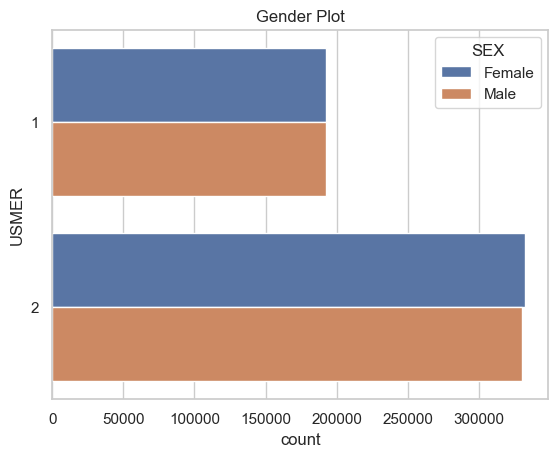

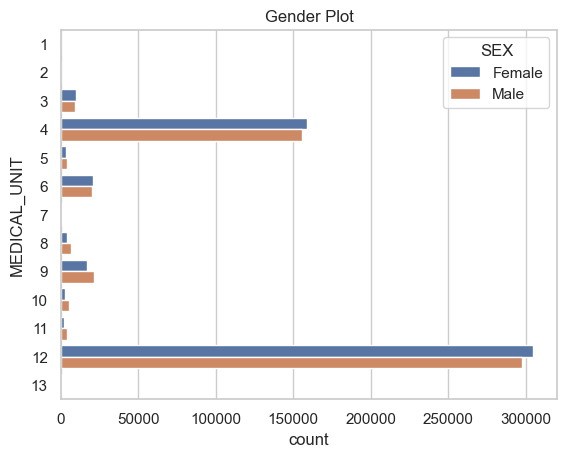

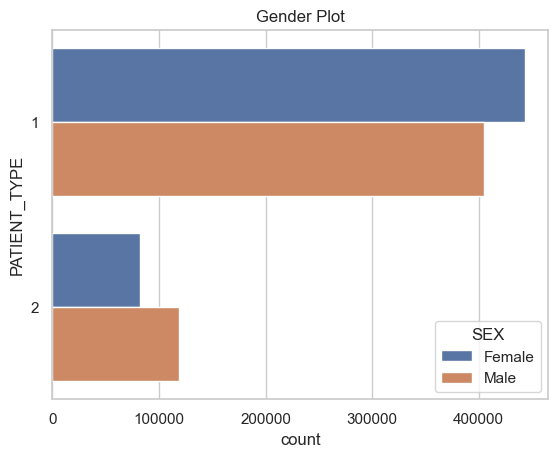

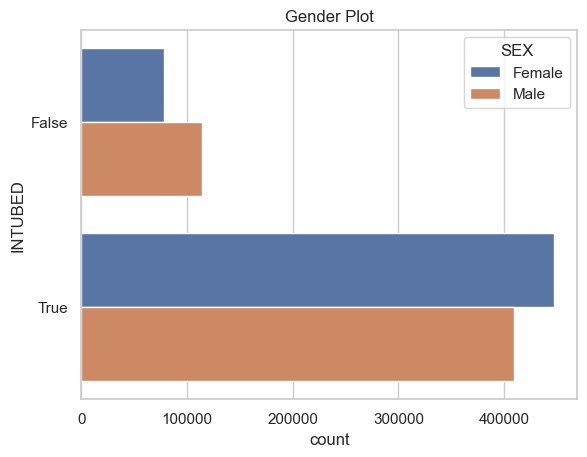

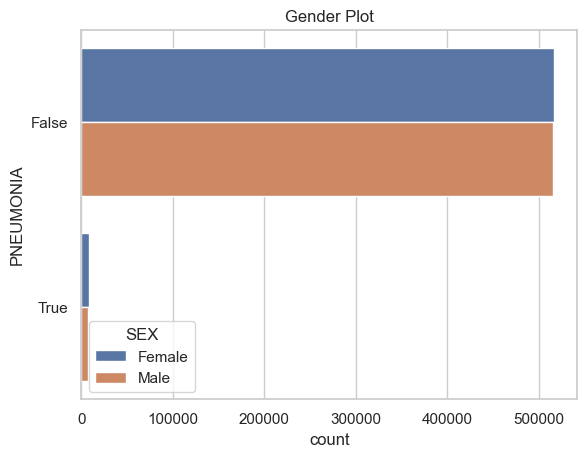

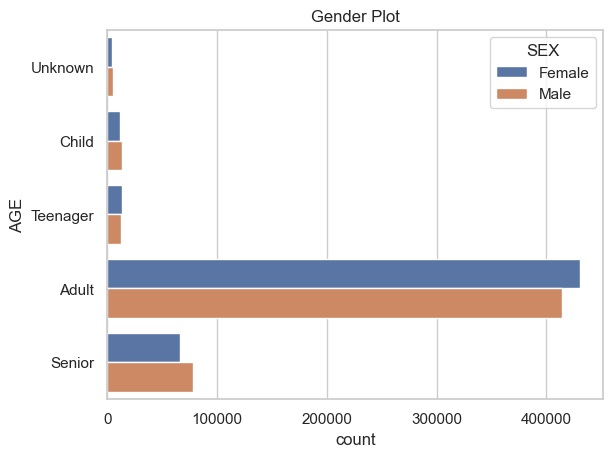

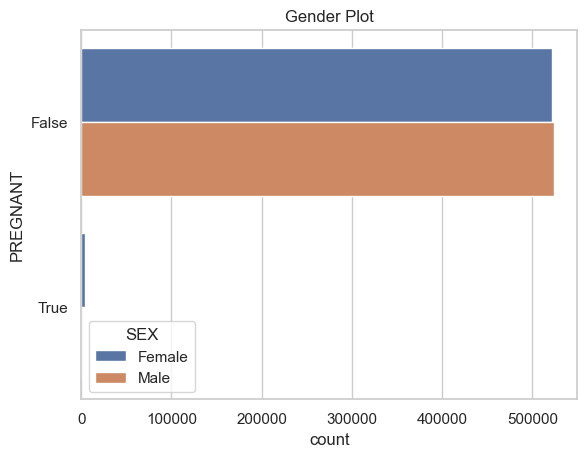

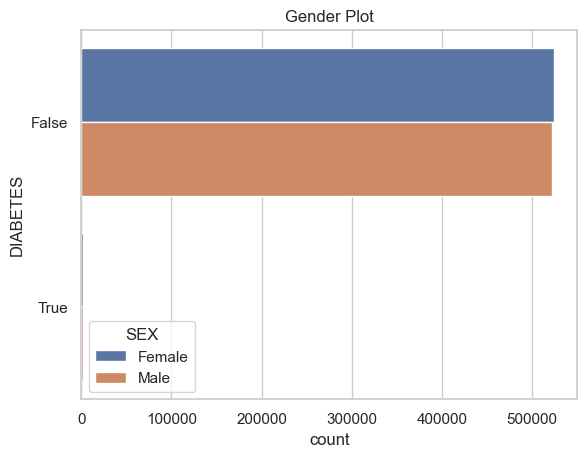

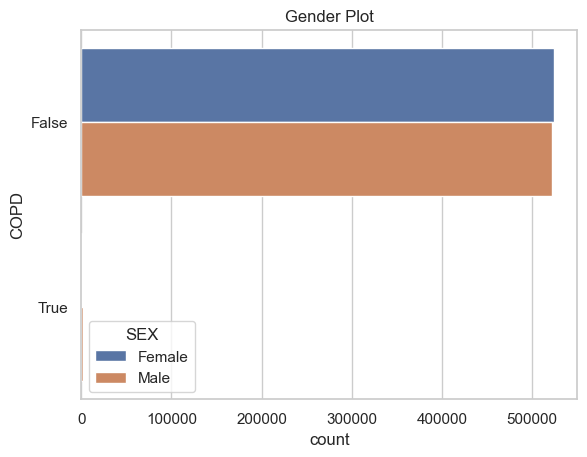

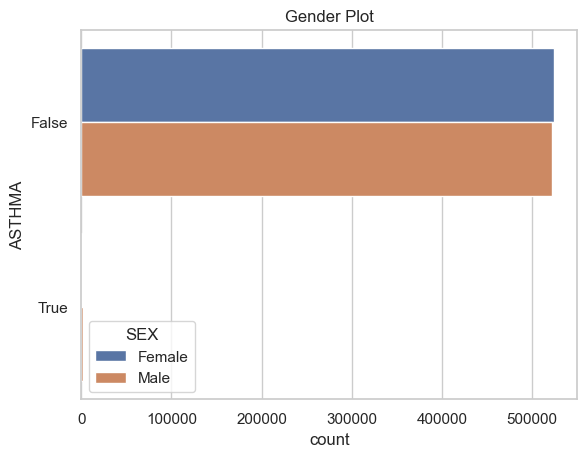

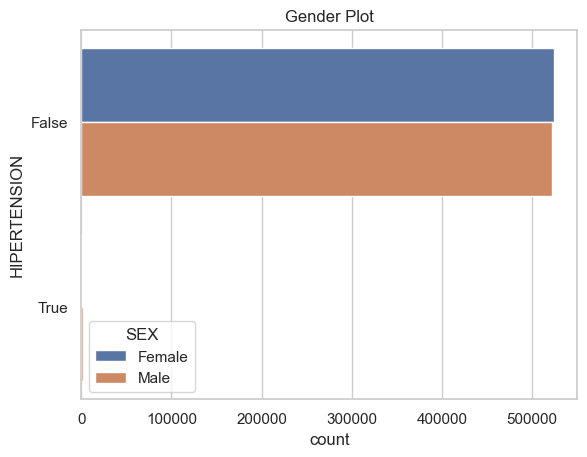

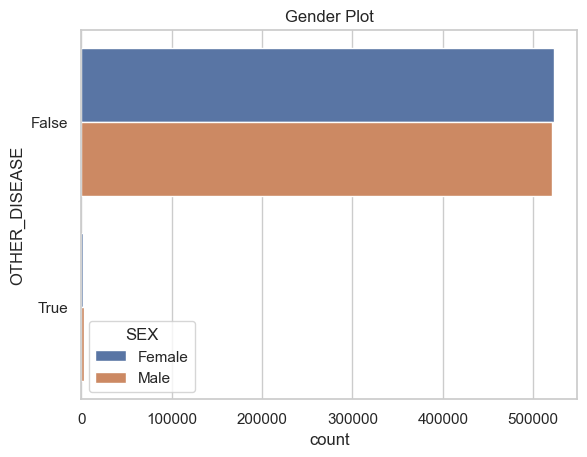

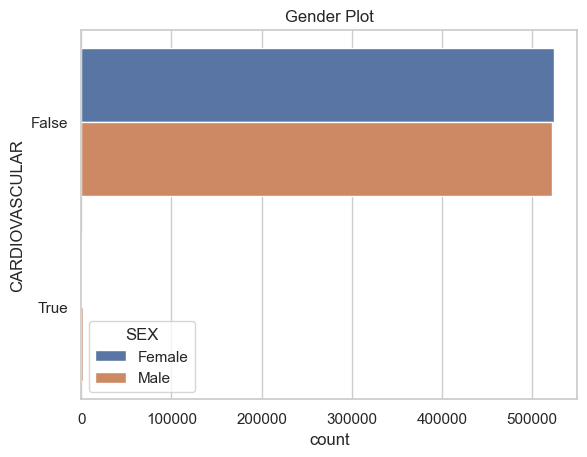

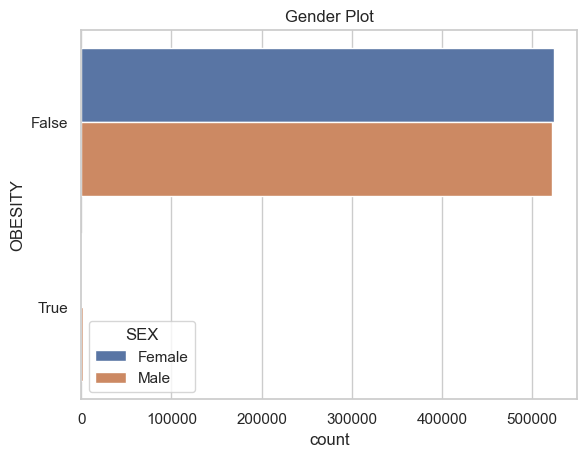

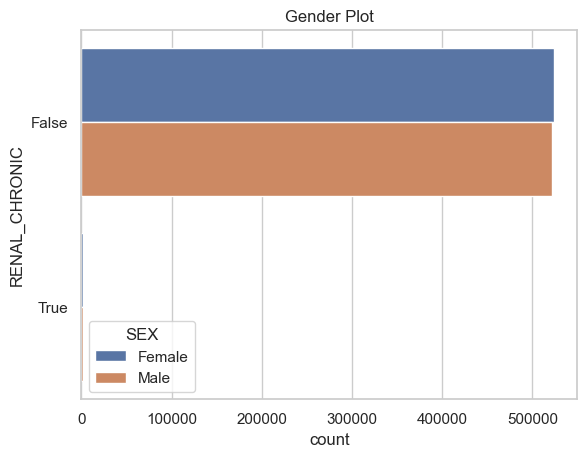

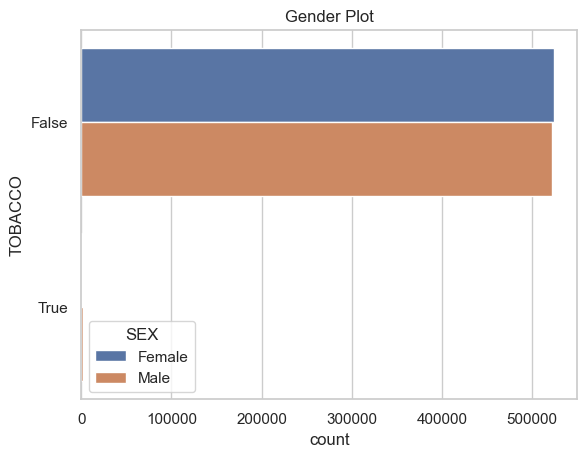

In [8]:
new_cols=cols
new_cols.remove("SEX")
for x in new_cols:
    sns.set(style="whitegrid")
    ax = sns.countplot(y=x, hue="SEX", data=df)
    plt.ylabel(x)
    plt.title('Gender Plot')
    plt.show()
    

In [9]:
#Checking if there are any people who had covid who where obese
df.loc[df['OBESITY']== True]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DEATH,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
790,2,3,Male,2,1,False,False,Senior,False,True,True,True,True,True,True,True,True,True
853,2,3,Female,2,1,False,False,Senior,False,True,True,True,True,True,True,True,True,True
1210,2,3,Male,2,1,False,False,Senior,False,True,True,True,True,True,True,True,True,True
1352,2,3,Male,2,1,False,False,Adult,False,True,True,True,True,True,True,True,True,True
1428,1,3,Female,2,1,False,False,Senior,False,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048244,1,13,Female,2,0,False,False,Adult,False,True,True,True,True,True,True,True,True,True
1048258,1,13,Female,2,0,False,False,Adult,False,True,True,True,True,True,True,True,True,True
1048259,1,13,Male,2,0,False,False,Adult,False,True,True,True,True,True,True,True,True,True
1048260,1,13,Male,2,0,False,False,Adult,False,True,True,True,True,True,True,True,True,True


In [10]:
repSex = {"Female": 1,  "Male" : 2}
df.replace({"SEX": repSex},inplace=True)

In [11]:
#Naive-Bayes
def naive_Bayes(X,y,typ):
    y.astype('int')
    X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)
    model=typ
    clf=model.fit(X_train,y_train.astype('int'))
    pred_labels=model.predict(X_test)
    print("Classes: ",clf.classes_)
    print("\n*--------------------------------------------------*\n")
    if str(typ)=='GaussianNB()':
        print("Class Priors: ", clf.class_prior_)
    else:
        print("Class Priors: ", clf.class_log_prior_)
    score=model.score(X_test,y_test.astype('int'))
    print("\n*--------------------------------------------------*\n")
    print("Score: ",score)
    print("\n*--------------------------------------------------*\n")
    print('Training set score: {:.4f}'.format(model.score(X_train, y_train.astype('int'))))
    print('Test set score: {:.4f}'.format(model.score(X_test, y_test.astype('int'))))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test.astype('int'),pred_labels))
    print("\n*--------------------------------------------------*\n")
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test.astype('int'), y_pred.astype('int'))
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    return X_train,X_test,y_train.astype('int'),y_test.astype('int'),clf,pred_labels

Classes:  [0 1]

*--------------------------------------------------*

Class Priors:  [0.92659562 0.07340438]

*--------------------------------------------------*

Score:  0.9240254631285316

*--------------------------------------------------*

Training set score: 0.9237
Test set score: 0.9240

*--------------------------------------------------*

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    194349
           1       0.21      0.01      0.03     15366

    accuracy                           0.92    209715
   macro avg       0.57      0.50      0.49    209715
weighted avg       0.87      0.92      0.89    209715


*--------------------------------------------------*



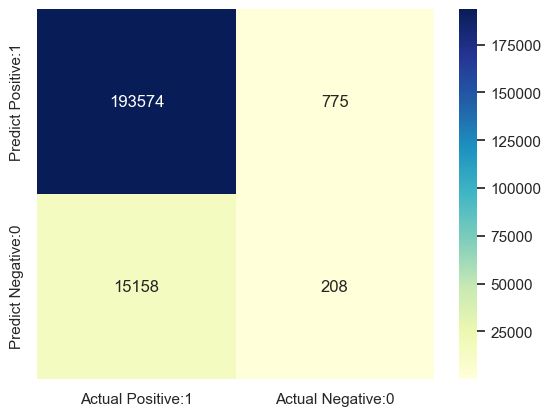

In [12]:
X=df["OTHER_DISEASE"].values.reshape(-1,1)
y=df["DEATH"].values
X_train,X_test,y_train,y_test,clf,pred_labels,=naive_Bayes(X,y,GaussianNB())


Classes:  [0 1]

*--------------------------------------------------*

Class Priors:  [-0.07623804 -2.61177164]

*--------------------------------------------------*

Score:  0.9267291323939633

*--------------------------------------------------*

Training set score: 0.9266
Test set score: 0.9267

*--------------------------------------------------*

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    194349
           1       0.00      0.00      0.00     15366

    accuracy                           0.93    209715
   macro avg       0.46      0.50      0.48    209715
weighted avg       0.86      0.93      0.89    209715


*--------------------------------------------------*



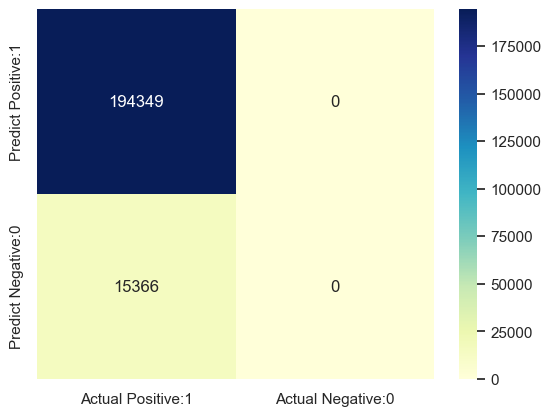

In [13]:
X=df["OTHER_DISEASE"].values.reshape(-1,1)
y=df["DEATH"].values
X_train,X_test,y_train,y_test,clf,pred_labels,=naive_Bayes(X,y,BernoulliNB())

In [17]:
#KNN
def knn(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train, Y_train.astype("int"))
    Y_predict_knn = knn_model.predict(X_test)
    #Comparing the output I expected (Y_test) against the ones the model predicted (Y_predict)
    knn_metrics = metrics.classification_report(Y_test.astype("int"),Y_predict_knn.astype("int"))
    print(knn_metrics)
    table = pd.DataFrame(Y_test.astype("int"))
    print('table 1')
    print(table.head())
    #add the predictions to the dataframe
    table['predictions'] = Y_predict_knn.astype("int")
    print('table 2')
    print(table.head())
    accuracy_knn = accuracy_score(Y_test.astype("int"),Y_predict_knn.astype("int"))
    precision_knn = precision_score(Y_test.astype("int"), Y_predict_knn.astype("int"))
    f1_knn = f1_score(Y_test.astype("int"),Y_predict_knn.astype("int"))
    recall_knn = recall_score(Y_test.astype("int"), Y_predict_knn.astype("int"))
    print(precision_knn)
    print(accuracy_knn)
    print(f1_knn)
    print(recall_knn)
    plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[accuracy_knn,f1_knn,recall_knn,precision_knn],color=['red','green','purple','orange'])
    plt.plot([accuracy_knn,f1_knn,recall_knn,precision_knn],color='black')
    plt.title('Evaluation Metrics for K-Nearest Neighbors')
#https://www.kaggle.com/code/prashant111/knn-classifier-tutorial

              precision    recall  f1-score   support

           0       0.59      1.00      0.74     17644
           1       0.71      0.00      0.01     12356

    accuracy                           0.59     30000
   macro avg       0.65      0.50      0.37     30000
weighted avg       0.64      0.59      0.44     30000

table 1
   0
0  1
1  0
2  1
3  1
4  0
table 2
   0  predictions
0  1            0
1  0            0
2  1            0
3  1            0
4  0            0
0.7083333333333334
0.5888
0.005482102547565302
0.002751699579151829


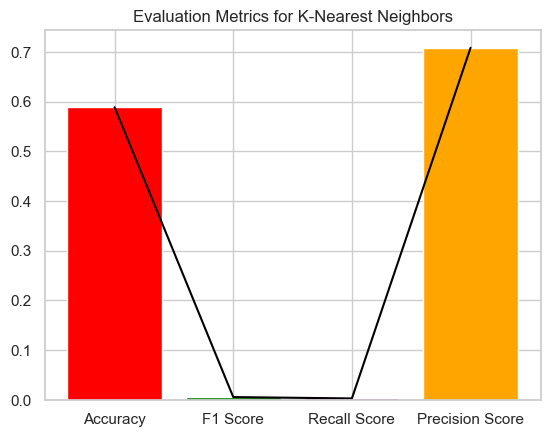

In [19]:
knn(X=df["OTHER_DISEASE"].iloc[:100000].values.reshape(-1,1),
Y = df["DEATH"].iloc[:100000].values)

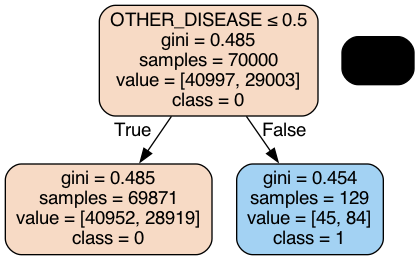

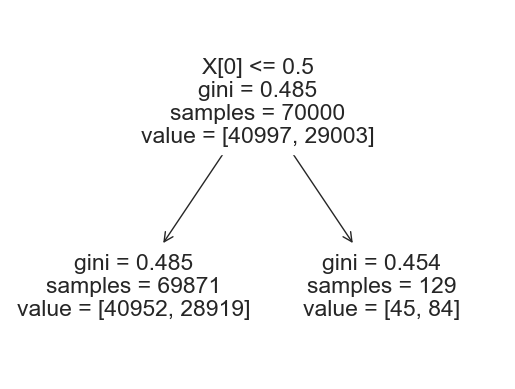

In [38]:
X=df["OTHER_DISEASE"].iloc[:100000].values.reshape(-1,1)
y = df["DEATH"].iloc[:100000].values.astype("int")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
tree.plot_tree(clf)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ["OTHER_DISEASE"],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('covid_DT1.png')
Image(graph.create_png())

In [39]:
#https://scikit-learn.org/stable/modules/tree.html
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
print(clf.predict(X_test))


[0.41366323 0.41366323 0.41366323 ... 0.41366323 0.41366323 0.41366323]


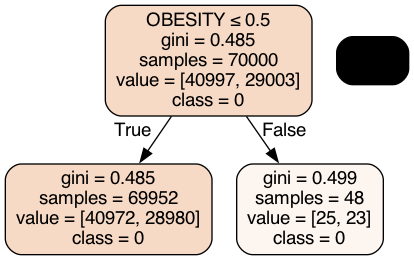

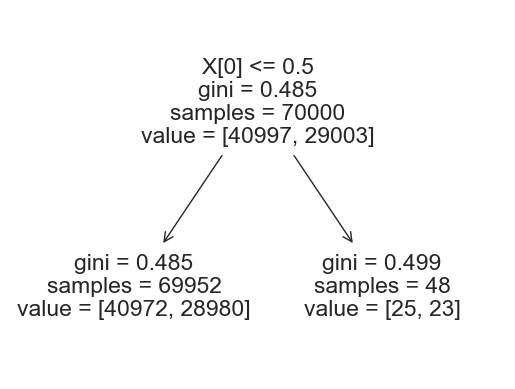

In [41]:
X=df["OBESITY"].iloc[:100000].values.reshape(-1,1)
y = df["DEATH"].iloc[:100000].values.astype("int")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
tree.plot_tree(clf)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ["OBESITY"],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('covid_DT2.png')
Image(graph.create_png())

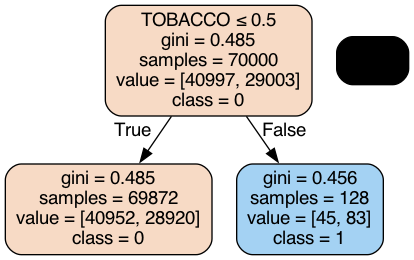

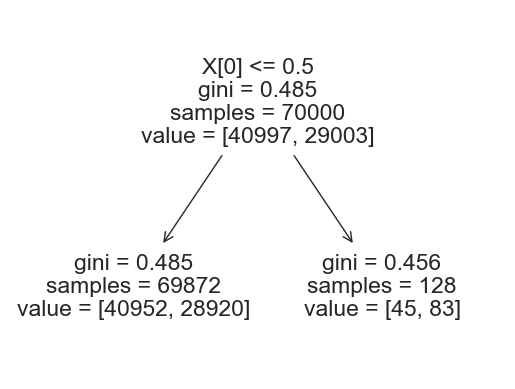

In [42]:
X=df["TOBACCO"].iloc[:100000].values.reshape(-1,1)
y = df["DEATH"].iloc[:100000].values.astype("int")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
tree.plot_tree(clf)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ["TOBACCO"],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('covid_DT.png')
Image(graph.create_png())

In [76]:
X=df["TOBACCO"].iloc[:100000].values.reshape(-1,1)
y = df["DEATH"].iloc[:100000].values.astype("int")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
def neural_network():
    scaler = StandardScaler()

    scaler.fit(X_train)

    train_data = scaler.transform(X_train)
    test_data = scaler.transform(X_test)
    print(train_data[:3])

    mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

    mlp.fit(train_data, y_train)

    predictions_train = mlp.predict(train_data)
    predictions_test = mlp.predict(test_data)
    percent = (mlp.score(test_data, y_test))

    return ["Neural Network", percent, mlp]

[[-0.04280095]
 [-0.04280095]
 [-0.04280095]]


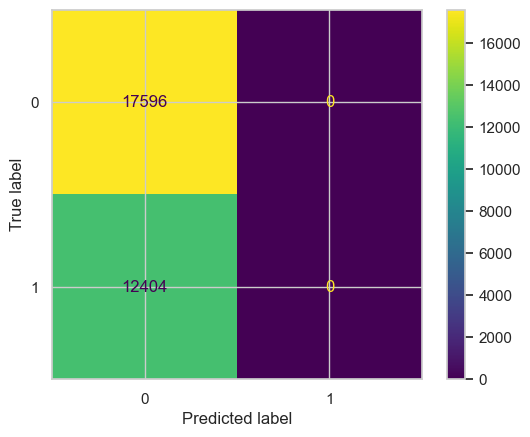

In [80]:
r=neural_network()
plot_confusion_matrix(r[2],X_test,y_test)

0.58708


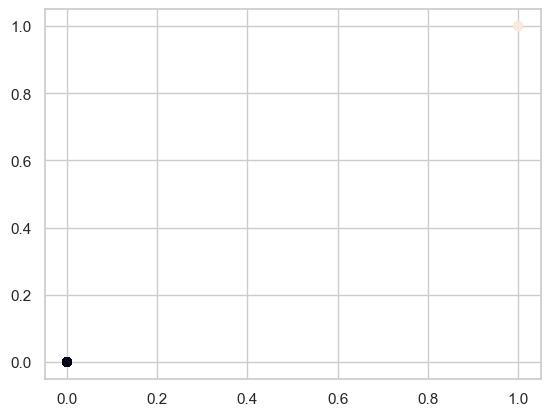

In [84]:
X=df["OTHER_DISEASE"].iloc[:100000].values.reshape(-1,1)
y = df["DEATH"].iloc[:100000].values.astype("int")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = Perceptron(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
fig, ax = plt.subplots()
X_data = X.to_numpy()

y_all = clf.predict(X_data)
ax.scatter(x=X_data[:,0], y=X_data[:,0], c=y_all, alpha=.25)

In [ ]:
repSex = {1: "Female", 2: "Male"}
df.replace({"SEX": repSex},inplace=True)

In [10]:
#Using TransactionEncoder, could take few minutes, I had to drop rows because it wouldn't compile
data = []
df_te=df.iloc[:1000]
for i in range(0, df_te.shape[0]-1):
    data.append([str(df_te.values[i,j]) for j in range(0, df_te.shape[1])])

    
th = TransactionEncoder()
th_arr = th.fit(data).transform(data)
new_df = pd.DataFrame(th_arr,columns=th.columns_)
new_df.head()


,0,1,2,3,Adult,Child,False,Female,Male,Senior,Teenager,True,Unknown
0,False,True,True,False,False,False,True,True,False,True,False,True,False
1,False,True,True,False,False,False,True,False,True,True,False,True,False
2,False,True,True,False,True,False,True,False,True,False,False,False,False
3,False,True,True,False,True,False,True,True,False,False,False,True,False
4,False,True,True,False,False,False,True,False,True,True,False,True,False


In [13]:
apr = apriori(new_df,min_support = 0.2, use_colnames = th.columns_)
apr.head()

,support,itemsets
0,0.310310,(0)
1,1.000000,(1)
2,0.996997,(2)
3,0.679680,(3)
4,0.495495,(Adult)


['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
My configuration:  antecedent support  :  0.7
    antecedents                  consequents  antecedent support  \
0           (1)                          (0)            1.000000   
1           (2)                          (0)            0.996997   
2       (False)                          (0)            1.000000   
3           (2)                          (1)            0.996997   
4           (1)                          (2)            1.000000   
..          ...                          ...                 ...   
349  (1, False)         (2, Senior, Male, 3)            1.000000   
350  (2, False)         (Senior, 1, Male, 3)            0.996997   
351         (1)  (2, Male, Senior, False, 3)            1.000000   
352         (2)  (1, Male, Senior, False, 3)            0.996997   
353     (False)      (1, 2, Male, Senior, 3)            1.000000   

     conse

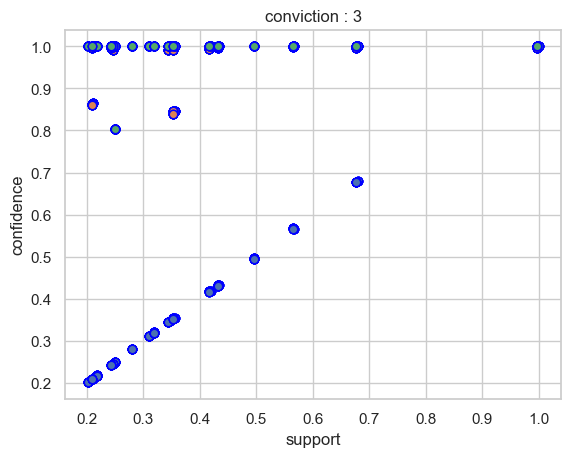

In [14]:
config = [ ('antecedent support',0.7),('confidence',0.8),('conviction',3)]
for metric, new_th in config:
    rules = association_rules(apr, metric = metric, min_threshold=new_th)
    if rules.empty:
        print("Dataframe is Empty")
    print(rules.columns.values)
    print("My configuration: ", metric, " : ",new_th)
    print(rules)
    
    support = rules.loc[:,"support"]
    confidence = rules.loc[:,'confidence']
    plt.scatter(support,confidence,edgecolors="blue")
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.title(metric+' : ' +str(new_th))
    plt.savefig('plot%03s.png'%(metric))

    

In [15]:
print(rules[rules['consequents']==frozenset({'Yes'})].to_string())
print("\n-------------------------------------------\n")
print(rules[rules['antecedents']==frozenset({'Female'})].to_string())
print("\n-------------------------------------------\n")
print(rules[rules['antecedents']==frozenset({'Male'})].to_string())
print("\n-------------------------------------------\n")
print(rules[rules['antecedents']==frozenset({'Senior'})].to_string())
print("\n-------------------------------------------\n")

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

-------------------------------------------

   antecedents consequents  antecedent support  consequent support   support  confidence  lift  leverage  conviction
9     (Female)         (1)            0.433433                 1.0  0.433433         1.0   1.0       0.0         inf
17    (Female)     (False)            0.433433                 1.0  0.433433         1.0   1.0       0.0         inf
65    (Female)  (1, False)            0.433433                 1.0  0.433433         1.0   1.0       0.0         inf

-------------------------------------------

   antecedents consequents  antecedent support  consequent support   support  confidence  lift  leverage  conviction
10      (Male)         (1)            0.566567                 1.0  0.566567         1.0   1.0       0.0         inf
18      (Male)     (False)            0.566567         